## <span>1. Introduction</span>

Cyclistic is a fictional bike-share company in Chicago that offer many bike options for riders such as classic bikes, electric bikes, reclining bikes, hand tricycles and cargo bikes. The company offers three pricing plans: single-ride passes, full-day passes, and annual memberships. Riders who buy single-ride or full-day passes are considered as casual riders, meanwhile riders who buy annual memberships are Cyclistic members.
The company want to increase the profit by maximizing the number of annual members since they realize that annual members bring more profit than casual riders.

## <span>2. Objectives</span>

The purpose of this case study is to analyze the difference in using bike-share services between casual riders and annual members so that the Cyclistic marketing team can design a new marketing strategy to convert cuasual riders into annual members.

## <span>3. Data source</span>

The data source used in this case study is bike-share data that belongs to Bikeshares, a company operates the City of Chicago’s (“City”) Divvy bicycle sharing service. Bikeshares has made the data public to access, reproduce, analyze, copy, modify and distribute according to the Data License Agreement on the website.
The dataset is stored on https://divvybikes.com/system-data, which includes trip data from 2013 until now.

The dataset I will use in this case study is the datset of year 2022, which includes 12 CSV files where each file stores the data of trips taken in each month from 01/2022 to 12/2022. The data of trip have been captures are:

* Trip start day and time
* Trip end day and time
* Trip start station
* Trip end station
* Rider type (Member, Single Ride, and Day Pass)
* Bike type

## 4. Data cleaning and preparation

In this section, I will use Python and following packages to perform data cleaning and preparation.
* pandas
* matplotlib.pyplot
* matplotlib.ticker
* glob
* numpy

### 4.1. Import relevant packages

In [44]:
# import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import numpy as np

### 4.2. Import dataset

The dataset being used are 12 CSV files as followings:
* 202201-divvy-tripdata.csv
* 202202-divvy-tripdata.csv
* 202203-divvy-tripdata.csv
* 202204-divvy-tripdata.csv
* 202205-divvy-tripdata.csv
* 202206-divvy-tripdata.csv
* 202207-divvy-tripdata.csv
* 202208-divvy-tripdata.csv
* 202209-divvy-publictripdata.csv
* 2022010-divvy-tripdata.csv
* 2022011-divvy-tripdata.csv
* 2022012-divvy-tripdata.csv

I will import these files and combine them into a single dataframe.

In [2]:
# create a list of file paths
folder_path = "."
file_list = glob.glob(folder_path + "/*.csv")

# load all data and concat them into a single dataframe
trip_data = pd.DataFrame(pd.read_csv(file_list[0]))
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    trip_data = pd.concat([trip_data,df],axis=0, ignore_index=True)

### 4.3. Preview dataset

In [3]:
# preview data attributes and data type
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


The original dataset consists of 5,667,717 records and 13 attributes.

In [4]:
# list top five records in the dataset
trip_data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
# number of unique values in each column
trip_data.nunique()

ride_id               5667717
rideable_type               3
started_at            4745862
ended_at              4758633
start_station_name       1674
start_station_id         1313
end_station_name         1692
end_station_id           1317
start_lat              668346
start_lng              631047
end_lat                  1606
end_lng                  1590
member_casual               2
dtype: int64

### 4.4. Clean and format data

In this section I will look for any errors and inconsistencies in the data and then I will format the data.

#### 4.4.1. Duplicates

In [6]:
# check for any duplicate in the dataset
trip_data.duplicated().any()

False

There is no duplicate in the dataset.

#### 4.4.2. Missing values

In [7]:
# check for any missing values in each column
missing_values = trip_data.isna()
missing_values.sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

There are a lot of missing values about start station, end station and end coordinate information in the dataset. Before coming up with any approaches, I want to know how many rows that have missing values in the dataset and how big is it compared to the dataset.

In [8]:
# calculate number of rows having missing values
missing_value_row_count = missing_values.any(axis=1).sum()
missing_value_row_count

1298357

In [9]:
# calculate the percentage of total rows having missing values
percent_missing = (missing_value_row_count/trip_data.shape[0]) * 100
percent_missing.round(2)

22.91

There are 1,298,357 rows having missing values and they are accounted for 22.91% data of the dataset.

After considering the importance of these data if deleted and my objectives of analysis, I decide to apply following approaches:
* Remove any row has missing values in column end_lat or end_lng since the number of these rows is small.
* Keep rest of the data and replace missing values with "unknown" for user friendly.

In [10]:
# remove rows has missing values in columns end_lat or end_lng
trip_data.dropna(subset=["end_lat", "end_lng"], inplace=True)

In [11]:
# replace missing values with "Unkown"
trip_data.fillna("unknown", inplace=True)

In [12]:
# verify missing values again
trip_data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### 4.4.3. Convert datetime columns

There are two dateime columns in the dataset which are formated as object data types, so I will use to_datetime function to convert them into datetime data types with format as "YYYY-mm-dd HH:MM:SS".

In [13]:
# convert started_at and ended_at columns into datetime
trip_data["started_at"] = pd.to_datetime(trip_data.started_at, format="%Y/%m/%d %H:%M:%S")
trip_data["ended_at"] = pd.to_datetime(trip_data.ended_at, format="%Y/%m/%d %H:%M:%S")

#### 4.4.4. Datetime validation

Since the bike is unlocked at one sation and locked again at another station. The time when the bike is locked again must be later compare to the time that the bike is unlocked.

I will validate this condition by checking the difference between ended_at and started_at columns.

In [14]:
# check if any record has ended_at < started_at
(trip_data["ended_at"] < trip_data["started_at"]).any()

True

In [15]:
# check for number of records having ended_at < started_at
trip_data.loc[trip_data["ended_at"] < trip_data["started_at"]].ride_id.count()

100

There are 100 records in our dataset have ended time < started time. So I will drop these records.

In [16]:
# drop records having ended_at < started_at
trip_data = trip_data.loc[trip_data["ended_at"] > trip_data["started_at"]]

In [17]:
# verify again
trip_data.loc[trip_data["ended_at"] < trip_data["started_at"]].ride_id.count()

0

### 4.4.5. Remove white space

I will use strip function to remove any leading and trailing spaces in column rideable_type, start_station_name, start_station_id, end_station_name, end_station_id, and member_casual.

In [18]:
# get list of columns then convert object columns to string and remove leading and traling spaces
for col in trip_data.columns:
    if trip_data[col].dtypes == "object":
        new_col = trip_data[col].astype("str")
        trip_data[col] = new_col.str.strip()

## 5. Data Analysis

In this section I will analyze trip data to find trends in using bike-share services between casual riders and Cyclistic members.

### 5.1. Proportion of members and casual trips

I want to see how is the proportion of trips by casual riders and Cyclistic members in 2022.

In [19]:
# calculate total number of trips by member_casual
member_casual_trip_count = trip_data.groupby("member_casual")["ride_id"].count()
member_casual_trip_count

member_casual
casual    2316600
member    3344728
Name: ride_id, dtype: int64

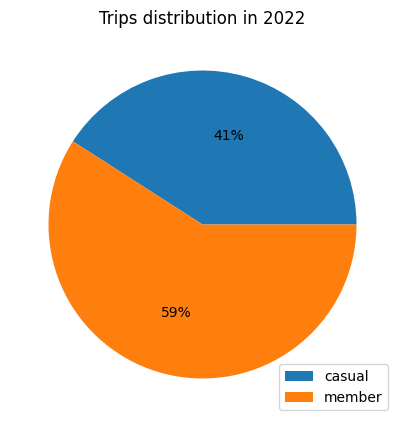

In [20]:
# create pie chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(member_casual_trip_count, autopct='%.0f%%')
ax.set_title("Trips distribution in 2022")
ax.legend(labels=member_casual_trip_count.index, loc="lower right")
plt.show()

In 2022, 59% of trips taken by Cyclistics member meanwhile the percentage for casual riders is 41%.

### 5.2. Bike types preferences

In [21]:
# calculate counts of bike types by member_casual
bike_types_count = trip_data.groupby(["member_casual", "rideable_type"]).agg(trip_count=("ride_id", "count"))

In [22]:
bike_types_count.sort_values(by="trip_count")

trip_count
member_casual rideable_type            
casual        docked_bike        174852
              classic_bike       888853
              electric_bike     1252895
member        electric_bike     1635735
              classic_bike      1708993

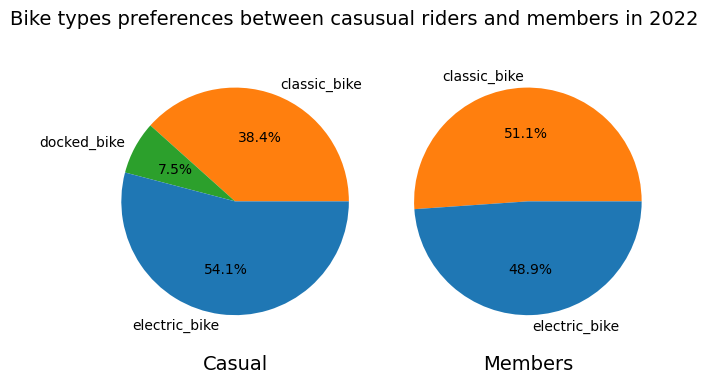

In [23]:
# create figure and axes
fig, (ax1, ax2)= plt.subplots(1, 2, layout="constrained")

# set color mapping for labels
colors = {"classic_bike": "C1", "electric_bike":"C0", "docked_bike":"C2"}

# plot casual data
label1 = bike_types_count.loc["casual"].index
size1 = bike_types_count.loc["casual"]["trip_count"]
ax1.pie(size1, labels=label1, autopct='%1.1f%%', colors=[colors[c] for c in label1])
ax1.set_xlabel("Casual", fontdict={"size": 14})

# plot member data
label2 = bike_types_count.loc["member"].index
size2 = bike_types_count.loc["member"]["trip_count"]
ax2.pie(size2, labels=label2, autopct='%1.1f%%', colors=[colors[c] for c in label2])
ax2.set_xlabel("Members", fontdict={"size": 14})

fig.suptitle("Bike types preferences between casusual riders and members in 2022", fontsize=14, y=0.9)

plt.show()

Cyclistic members perfer using classic_bike a bit more than electric_bike, meanwhile casusal riders like to use electric_bike the most. Apart from classic_bike and electric_bike, casual riders also use other bikes.

### 5.3. Monthly trips

I will analyze the data to see how is the trends between members and casual riders during the year.

In [24]:
# extract month value and assign to new column
trip_data = trip_data.assign(month = trip_data["started_at"].dt.month)

In [25]:
# count trip by month and member_casual
month_data = trip_data.groupby(["member_casual", "month"]).agg(trip_count=("ride_id", "count"))

In [26]:
month_data.unstack()

trip_count                                                 \
month                 1      2       3       4       5       6       7    
member_casual                                                             
casual             18460  21359   89636  126102  279737  368060  405146   
member             85219  94168  194122  244799  354351  400023  417323   

                                                       
month              8       9       10      11      12  
member_casual                                          
casual         358130  296044  208584  100554   44788  
member         426882  404511  349561  236893  136876

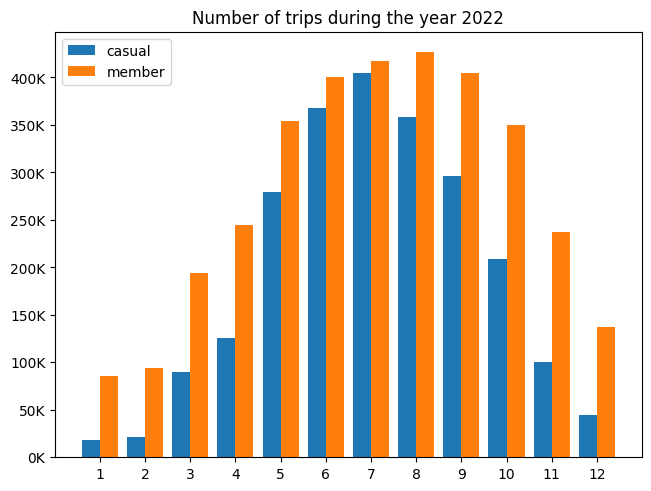

In [55]:
# creat double bar chart
fig, ax = plt.subplots(layout='constrained')

x = np.arange(12)
width = 0.4

# plot casual bar chart
data1 = month_data.loc["casual"]["trip_count"]
ax.bar(x - width/2, data1, width, label="casual")

# plot member bar chart
data2 = month_data.loc["member"]["trip_count"]
ax.bar(x + width/2, data2, width, label="member")

# set label, title and legend
x_label = month_data.loc["member"].index
ax.set_xticks(x, x_label)
ax.set_title("Number of trips during the year 2022")
ax.legend(loc='upper left')

# format y ticks
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,d}'.format(round(x/1000)) + 'K'))

From the graph, we can clearly see that the number of trips increased significantly in the middle of year from May to October for both members and casual riders. Casual riders have highest trips in July and the highest trips for members is in August.

### 5.4. Average trips by days of the week

In [28]:
# extract date and days of the week
date_data = trip_data.assign(date = trip_data["started_at"].dt.date, 
                             day_name = trip_data["started_at"].dt.day_name())

In [29]:
# group data by member_casual, date and days of the week
date_data = date_data.groupby(["member_casual", "date", "day_name"], as_index=False).ride_id.count()

In [30]:
# calculate average trips by member_casual and days of the week
weekday_data = date_data.groupby(["member_casual", "day_name"]).agg(avg_trip = ("ride_id", "mean"))


In [31]:
# sort indexs
day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_casual = ["casual", "member"]
weekday_data = weekday_data.reindex(pd.MultiIndex.from_product([member_casual, day_name], 
                                                               names=["member_casual", "day_name"]))
weekday_data = weekday_data.round(0).astype("int")
weekday_data.unstack()

avg_trip                                                  
day_name        Friday Monday Saturday Sunday Thursday Tuesday Wednesday
member_casual                                                           
casual            6421   5328     8906   7461     5936    5061      5266
member            8980   9100     8361   7444    10233    9971     10072

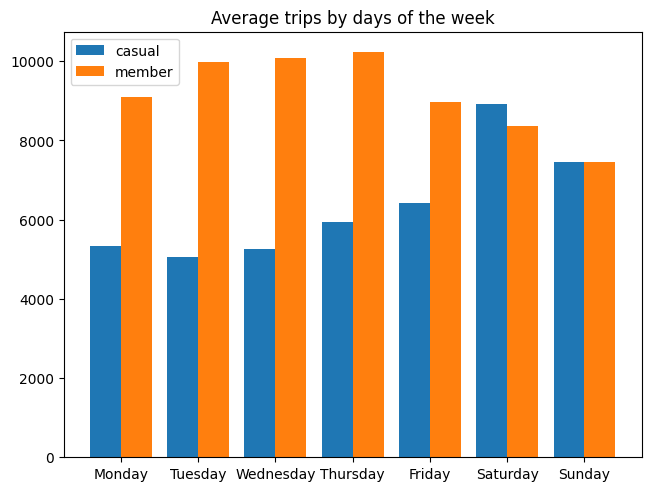

In [32]:
# plot data on bar chart
fig, ax = plt.subplots(layout='constrained')

x = np.arange(7)
width = 0.4

# plot casual bar chart
data1 = weekday_data.loc["casual"]["avg_trip"]
ax.bar(x - width/2, data1, width, label="casual")

# plot member bar chart
data2 = weekday_data.loc["member"]["avg_trip"]
ax.bar(x + width/2, data2, width, label="member")

# set label, title and legend
x_label = weekday_data.loc["member"].index
ax.set_xticks(x, x_label)
ax.set_title("Average trips by days of the week")
ax.legend(loc='upper left')

We can see that members use bike-share services in weekday more than weekend meanwhile casual riders is on the contrary.

### 5.5. Hourly trips throughout the day

In [33]:
# extract date and hour data
date_hour_data = trip_data.assign(date = trip_data["started_at"].dt.date, 
                             hour = trip_data["started_at"].dt.hour)

In [34]:
# count trips by member_casual, date and hour
date_hour_data = date_hour_data.groupby(["member_casual", "date", "hour"], as_index=False).ride_id.count()

In [35]:
# calculate average number of trips by member_casual and hour
hour_data = date_hour_data.groupby(["member_casual", "hour"]).agg(avg_trip = ("ride_id", "mean"))

In [36]:
# cast data to integer
hour_data = hour_data.round().astype("int")
hour_data.unstack()

avg_trip                                          ...            \
hour                0   1   2   3   4   5    6    7    8    9   ...   14   15   
member_casual                                                   ...             
casual             128  84  52  31  21  34   81  141  191  198  ...  437  488   
member              99  61  36  22  25  88  250  473  560  394  ...  507  607   

                                                       
hour            16   17   18   19   20   21   22   23  
member_casual                                          
casual         541  604  540  414  307  262  236  177  
member         799  957  780  565  397  311  238  156  

[2 rows x 24 columns]

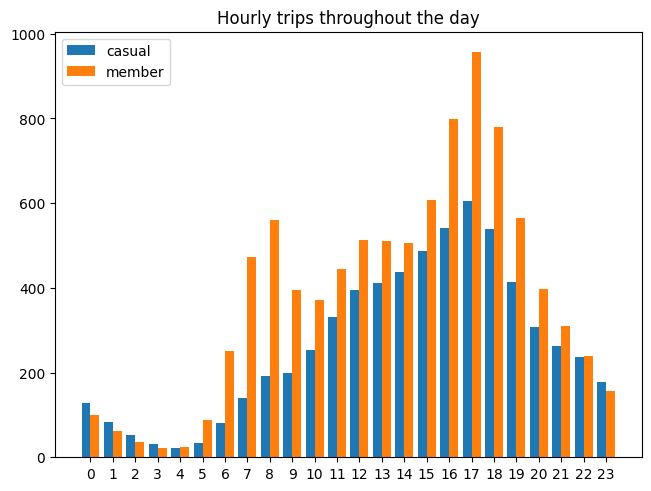

In [37]:
# plot data on bar chart
fig, ax = plt.subplots(layout='constrained')

x = np.arange(24)
width = 0.4

# plot casual bar chart
data1 = hour_data.loc["casual"]["avg_trip"]
ax.bar(x - width/2, data1, width, label="casual")

# plot member bar chart
data2 = hour_data.loc["member"]["avg_trip"]
ax.bar(x + width/2, data2, width, label="member")

# set label, title and legend
x_label = hour_data.loc["member"].index
ax.set_xticks(x, x_label)
ax.set_title("Hourly trips throughout the day")
ax.legend(loc='upper left')

The above bar chart shows that more trips are taken in the day time. Both members and casual riders use bike-share services more in the afternoon and the peak time is at 5 PM.

### 5.6. Average trip duration

In [38]:
# caculate trip duration in minutes
duration_data = trip_data.assign(
    duration = (trip_data["ended_at"] - trip_data["started_at"])/pd.Timedelta(minutes=1))

In [39]:
duration_data["duration"] = duration_data["duration"].round(2)

In [40]:
# statistic of trip duration
average_duration = duration_data.groupby(["member_casual"]).duration.mean().round(2)
average_duration

member_casual
casual    21.99
member    12.41
Name: duration, dtype: float64

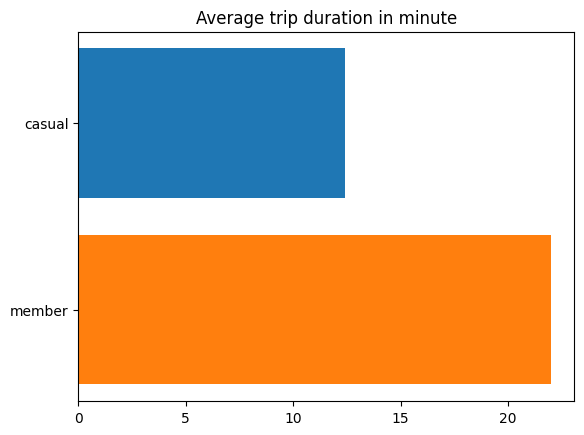

In [41]:
# plot data on bar chart
fig, ax = plt.subplots()

label = ("member", "casual")
y_pos = np.arange(len(label))

ax.barh(y_pos, average_duration, color=["C1", "C0"])
ax.set_yticks(y_pos, labels=label)
ax.set_title('Average trip duration in minute')

plt.show()

In general, we can see that casual riders have longer trip than members with 22 minutes compared to 12.4 minutes.

## 6. Conclusions

* In 2022, members use bike-share services more than casual riders with 59% of total trips.
* Casula rider prefer electric bike the most, while members like to use classic bike than electric bike.
* Both members and casual riders made more trips in warmer months from May to Octorber.
* Casual riders use bike-share services more in the weekends meanwhile membres use them more in weekday.
* Both membres and casual riders use more bike-share services in the afternoon and the peak time is 5PM.
* Casual riders take longer trips than members.